## Aim is to build a model using CNN and augemetation for cats and dogs classification

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

Now lets setup data directory, this directory is not uploaded on my github but the link is given 
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [2]:
Train_data_dir = '.\\Dataset\\Dogs_vs_cats\\cats_and_dogs_filtered\\train'
Validation_data_dir = '.\\Dataset\\Dogs_vs_cats\\cats_and_dogs_filtered\\validation'


In [3]:
#now lets count training and testing data size
import os
train_size = len( os.listdir( os.path.join( Train_data_dir, 'dogs') )) + len( os.listdir((os.path.join( Train_data_dir, 'cats'))))
validation_size = len( os.listdir( os.path.join( Validation_data_dir, 'dogs') )) + len( os.listdir((os.path.join( Validation_data_dir, 'cats'))))
print(train_size, validation_size )

2000 1000


In [4]:
#lets create a model of three convolution layers

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(15, (3,3), activation = 'relu', input_shape =(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    #now lets create a dense layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 15)      420       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 15)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4352      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        3

In [6]:
# now letas create data inputs with augmentation

from tensorflow.keras.preprocessing.image  import ImageDataGenerator
from tensorflow.keras.preprocessing import image

Trainig = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 45,
    shear_range = 0.2,
    zoom_range = 0.4,
    horizontal_flip = True
    
)

Validating = ImageDataGenerator(
    rescale = 1./255.,
)


In [7]:
batch_size = 30

In [8]:
Trainig_data = Trainig.flow_from_directory(
    Train_data_dir,
    target_size= (200,200),
    batch_size = batch_size,
    class_mode= 'binary'
)

Validatin_data = Validating.flow_from_directory(
    Validation_data_dir,
    target_size= (200,200),
    batch_size= batch_size,
    class_mode= 'binary'
    
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [10]:
history = model.fit_generator(
    Trainig_data,
    steps_per_epoch= train_size // batch_size,
    validation_data= Validatin_data,
    validation_steps=  validation_size // batch_size,
    epochs = 20
)

Epoch 1/20


ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

lets vizualize the training to see if the model is overfitting or not

In [87]:
Training_accuracy = history.history['acc']
Training_loss = history.history['loss']
validation_accuracy = history.history['val_acc']
validation_loss = history.history['val_acc']

epochs = range(len( Training_accuracy))

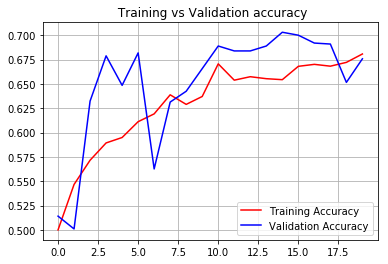

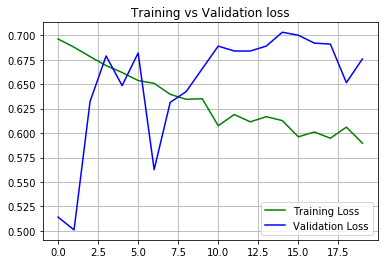

In [88]:
plt.plot( epochs, Training_accuracy, 'r', label = 'Training Accuracy'  )
plt.plot(epochs, validation_accuracy, 'b', label = 'Validation Accuracy')
plt.title(' Training vs Validation accuracy')
plt.legend(loc = 'best')
plt.grid()
plt.figure()

plt.plot( epochs, Training_loss, 'g', label = 'Training Loss')
plt.plot( epochs, validation_loss, 'b', label = 'Validation Loss')
plt.grid()
plt.title('Training vs Validation loss')
plt.legend(loc = 'best')
plt.show()

weird this is validation accuracy is increasing but validation loss is too increasing which means that i am achiving huge error on a low amount of data 

# time to test my model on testing image

In [50]:
import numpy as np

In [47]:
testing_path = 'D:\\Ml_course\\Dataset\\Dogs_vs_cats\\Testing\\'

the one thing i am suffering is from how to know which class output belong to which label

In [93]:
nrows = 4
ncols = 4


a dog      a dog      a dog      a dog      

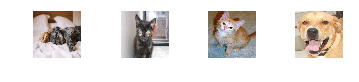

In [107]:
images = os.listdir( testing_path)
number_of_files = len(images)
fig = plt.figure()
#fig.set_size_inches(ncols * 4, nrows * 1)
i = 0
for test_image in images:
    img = image.load_img(os.path.join(testing_path, test_image), target_size=(200, 200))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    #print(classes[0])
    imgprint = image.load_img(os.path.join(testing_path, test_image), target_size=(500, 500))
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    plt.imshow(imgprint)
    if classes[0]>0.5:
        print("a dog", end = '      ')
    else:
        print("a cat", end = '      ')
    i += 1

plt.show()
        

weird my classifier is even classifying cats as dog

##  In the end only augmentation failed to increase the accuracy of my model 